In [1]:
### Bounding box om letters heen, daarna herkennen
#->

# andere dataset om letters te trainen, daarna dat model toepassen op mijn dataset

!pip3 install protobuf==3.20.3
!pip3 install tensorflow-datasets

import numpy as np
import os
import PIL
import PIL.Image
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import tensorflow_datasets as tfds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.1
    Uninstalling protobuf-4.22.1:
      Successfully uninstalled protobuf-4.22.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 6.5 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 15.1 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21484 sha256=aac73b7c579a3a558c0731ebc2b2850cb3176313e

In [2]:
import pathlib
data_dir = "./dataset/ocr_characters/"
#archive = tf.keras.utils.get_file(origin=dataset_url)
#data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
batch_size = 32
img_h = 120
img_w = 120

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + 'training_data/',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_h, img_w),
    batch_size=batch_size)

Found 20628 files belonging to 36 classes.
Using 16503 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir + 'testing_data/',
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_h, img_w),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 1008 files belonging to 36 classes.
Using 201 files for validation.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
    ])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=7)

Epoch 1/7
516/516 [==============================] - 29s 45ms/step - loss: 0.5883 - accuracy: 0.8581 - val_loss: 0.3628 - val_accuracy: 0.9104
Epoch 2/7
516/516 [==============================] - 20s 39ms/step - loss: 0.1741 - accuracy: 0.9507 - val_loss: 0.1773 - val_accuracy: 0.9353
Epoch 3/7
516/516 [==============================] - 20s 39ms/step - loss: 0.1065 - accuracy: 0.9655 - val_loss: 0.1921 - val_accuracy: 0.9353
Epoch 4/7
516/516 [==============================] - 20s 39ms/step - loss: 0.0836 - accuracy: 0.9704 - val_loss: 0.4810 - val_accuracy: 0.8458
Epoch 5/7
516/516 [==============================] - 20s 39ms/step - loss: 0.0774 - accuracy: 0.9742 - val_loss: 0.9096 - val_accuracy: 0.8060
Epoch 6/7
516/516 [==============================] - 21s 40ms/step - loss: 0.0734 - accuracy: 0.9739 - val_loss: 0.3298 - val_accuracy: 0.9104
Epoch 7/7
516/516 [==============================] - 20s 39ms/step - loss: 0.0532 - accuracy: 0.9809 - val_loss: 0.4266 - val_accuracy: 0.8856

7/7 [==============================] - 0s 16ms/step - loss: 0.4266 - accuracy: 0.8856


{'loss': 0.42655280232429504, 'accuracy': 0.8855721354484558}

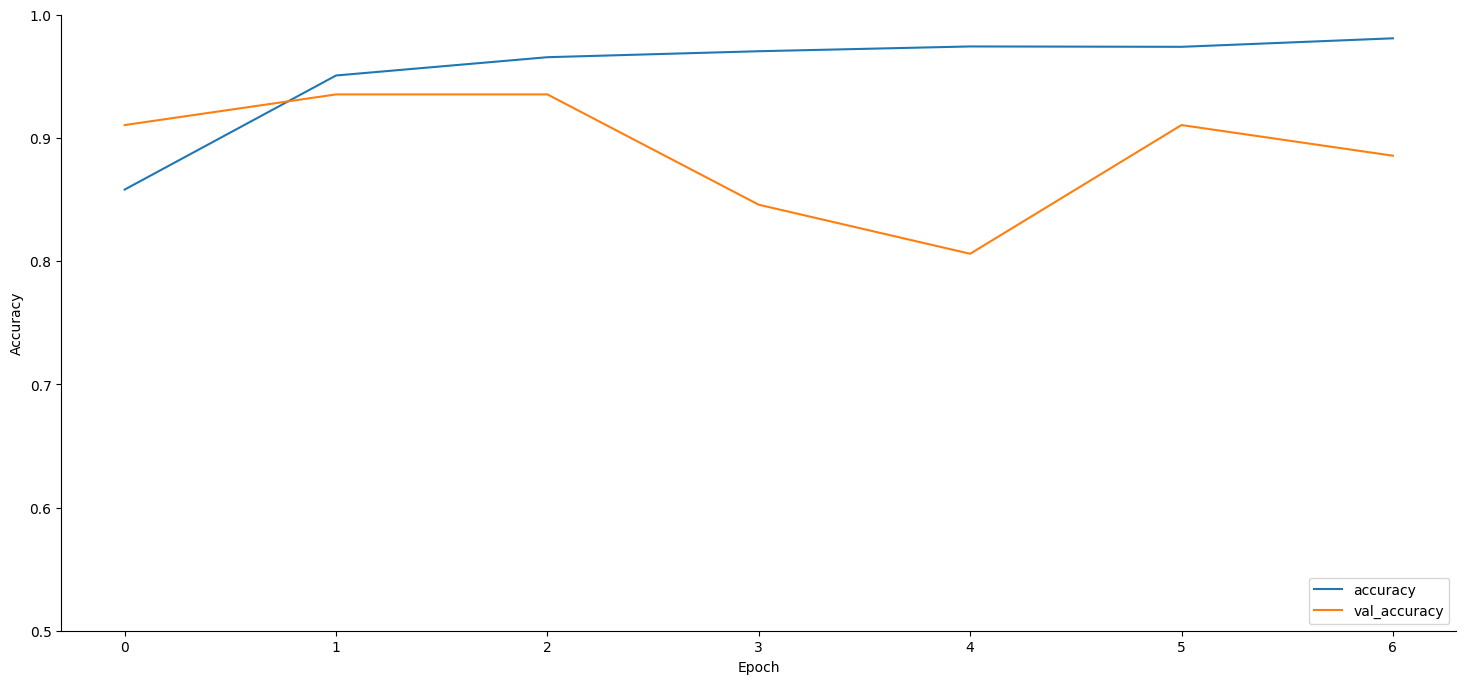

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

result = model.evaluate(val_ds)
dict(zip(model.metrics_names, result))